In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
D1 = np.loadtxt("co2_weekly_mlo.txt")
D2 = np.loadtxt("co2_annmean_mlo.txt")
D3 = np.loadtxt("co2_mm_mlo.txt")
D4 = np.loadtxt("co2_gr_mlo.txt")

In [3]:
#D1

2356


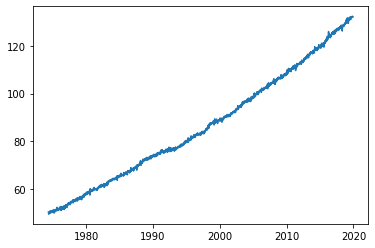

In [4]:
print(len(D1[:,4]))
plt.plot(D1[:,3], D1[:,8])
#plt.xlim(1990, 2000)
#plt.ylim(0, 400)

60


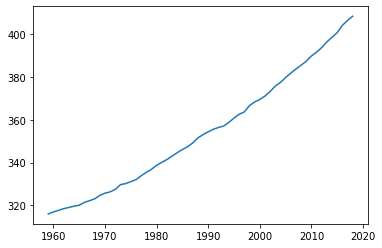

In [5]:
print(len(D2[:,1]))
plt.plot(D2[:,0], D2[:,1])

741

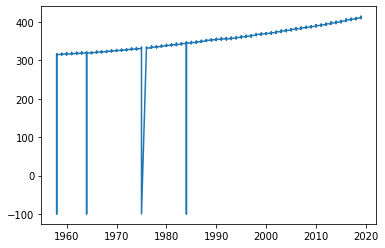

In [6]:
plt.plot(D3[:,0], D3[:,3])
len(D3[:,1])

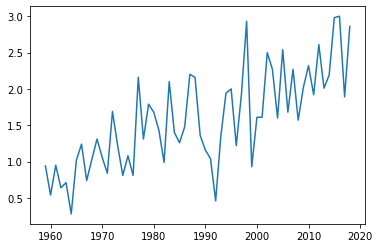

In [7]:
plt.plot(D4[:,0], D4[:,1])

In [8]:
f = lambda x, A, w, m, b, u: A*np.sin(x*w) + x**2*u + x*m + b

In [9]:
x = np.linspace(D1[:,3][0], D1[:,3][-1], 1000)
y = f(x, 1.1, 1.2e-1, 1.2, 1, 1)

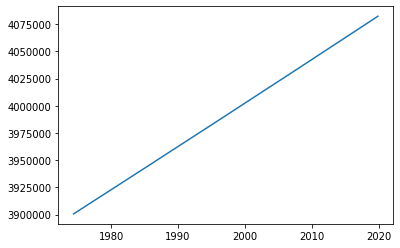

In [10]:
plt.plot(x, y)

In [11]:
from scipy.optimize import curve_fit

In [12]:
ff = -1

from scipy.signal import savgol_filter
yhat = savgol_filter(D1[:,4], 51, 3)

In [13]:
opt, cov = curve_fit(f, D1[:,3], yhat)
opt

array([ 1.46965338e-01,  1.00063467e+00, -5.06566207e+01,  4.91832209e+04,
        1.31248417e-02])

In [14]:
x = np.linspace(D1[:,3][0], D1[:,3][-1], len(D1[:,3]))
Y = f(x, *opt)
#Y = f(x, 3e-2,  6.5,  1.7689, -3.166e+03)

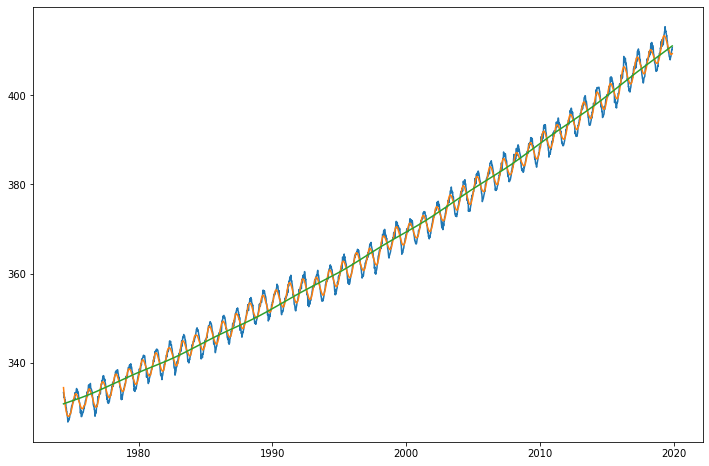

In [15]:
plt.figure(figsize = (12, 8))
plt.plot(D1[:, 3], D1[:,4])
plt.plot(D1[:, 3], yhat)
plt.plot(x, Y)

In [16]:
resta = D1[:,4] - D1[:,8]
#resta = yhat - Y

(1990, 2000)

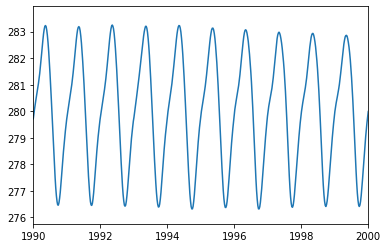

In [17]:
plt.plot(D1[:,3], resta)
plt.xlim(1990, 2000)

In [18]:
f2 = lambda x, A, w, b : A*np.sin(x*w) + b

In [19]:
fi = 300
popt, pcov = curve_fit(f2, D1[:,3][:fi], resta[:fi])
popt

array([-1.46460444e-01,  1.00034378e+00,  2.79939845e+02])

In [20]:
p = f2(D1[:, 3][:fi], *popt)
p = f2(D1[:, 3][:fi], 3.2, 6, 2.79973560e+02)

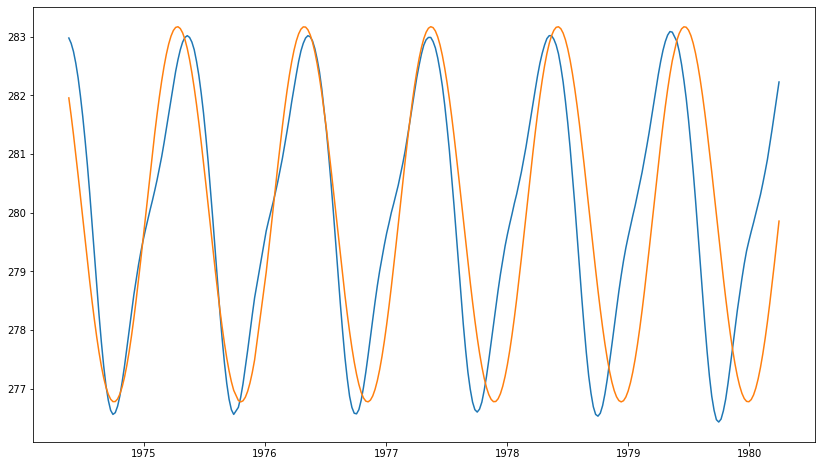

In [21]:
plt.figure(figsize = (14, 8))
plt.plot(D1[:,3][:fi], resta[:fi])
plt.plot(D1[:,3][:fi], p)